# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [3]:
!pip install citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | bambous virieux
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | port hardy
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | kramat
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | kedrovyy
Processing Record 10 of Set 1 | valparaiso
Processing Record 11 of Set 1 | college
Processing Record 12 of Set 1 | camopi
Processing Record 13 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 14 of Set 1 | arvika
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | kutum
Processing Record 17 of Set 1 | tobane
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 20 of Set 1 | hasaki
Processing Record 21 of Set 1 | hobyo
Processing Record 22 of Set 1

Processing Record 37 of Set 4 | provideniya
Processing Record 38 of Set 4 | kuytun
Processing Record 39 of Set 4 | tocopilla
Processing Record 40 of Set 4 | bathsheba
Processing Record 41 of Set 4 | ribeira grande
Processing Record 42 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 43 of Set 4 | saldanha
Processing Record 44 of Set 4 | vestmannaeyjar
Processing Record 45 of Set 4 | kyshtovka
Processing Record 46 of Set 4 | san pedro
Processing Record 47 of Set 4 | comodoro rivadavia
Processing Record 48 of Set 4 | hobart
Processing Record 49 of Set 4 | souillac
Processing Record 0 of Set 5 | afmadu
City not found. Skipping...
Processing Record 1 of Set 5 | pedasi
Processing Record 2 of Set 5 | portland
Processing Record 3 of Set 5 | lagoa
Processing Record 4 of Set 5 | safford
Processing Record 5 of Set 5 | guasdualito
Processing Record 6 of Set 5 | grindavik
Processing Record 7 of Set 5 | mezen
Processing Record 8 of Set 5 | yellowknife
Processing Record 9 of Set 

Processing Record 26 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 27 of Set 8 | atasu
Processing Record 28 of Set 8 | port moresby
Processing Record 29 of Set 8 | savinskiy
Processing Record 30 of Set 8 | namatanai
Processing Record 31 of Set 8 | orlik
Processing Record 32 of Set 8 | el balyana
City not found. Skipping...
Processing Record 33 of Set 8 | sarangani
Processing Record 34 of Set 8 | skibbereen
Processing Record 35 of Set 8 | terme
Processing Record 36 of Set 8 | masuguru
Processing Record 37 of Set 8 | chiang mai
Processing Record 38 of Set 8 | tiznit
Processing Record 39 of Set 8 | batagay-alyta
Processing Record 40 of Set 8 | cap-aux-meules
Processing Record 41 of Set 8 | erzin
Processing Record 42 of Set 8 | hammerfest
Processing Record 43 of Set 8 | san cristobal
Processing Record 44 of Set 8 | dukat
Processing Record 45 of Set 8 | laguna
Processing Record 46 of Set 8 | cocobeach
Processing Record 47 of Set 8 | tifton
Processing Record

Processing Record 15 of Set 12 | raga
Processing Record 16 of Set 12 | truckee
Processing Record 17 of Set 12 | ust-kuyga
Processing Record 18 of Set 12 | dongsheng
Processing Record 19 of Set 12 | vedaranniyam
City not found. Skipping...
Processing Record 20 of Set 12 | malanje
Processing Record 21 of Set 12 | senj
Processing Record 22 of Set 12 | astana
Processing Record 23 of Set 12 | sept-iles
Processing Record 24 of Set 12 | roma
Processing Record 25 of Set 12 | aybak
City not found. Skipping...
Processing Record 26 of Set 12 | vanimo
Processing Record 27 of Set 12 | chipinge
Processing Record 28 of Set 12 | ayagoz
Processing Record 29 of Set 12 | port macquarie
Processing Record 30 of Set 12 | katsuura
Processing Record 31 of Set 12 | kinshasa
Processing Record 32 of Set 12 | yaring
Processing Record 33 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 34 of Set 12 | shchelyayur
City not found. Skipping...
Processing Record 35 of Set 12 | coahuayana
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

NameError: name 'city_data' is not defined

In [5]:
# Display sample data
city_data_df.head()

NameError: name 'city_data_df' is not defined

In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

NameError: name 'city_data_df' is not defined

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,-42.7826,147.0587,14.72,86,97,0.44,AU,1674321576
1,bambous virieux,-20.3428,57.7575,26.14,83,40,1.54,MU,1674321576
2,atuona,-9.8000,-139.0333,25.75,79,14,7.17,PF,1674321571
3,port hardy,50.6996,-127.4199,4.24,97,100,4.63,CA,1674321325
4,ushuaia,-54.8000,-68.3000,11.81,76,75,2.57,AR,1674321577


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

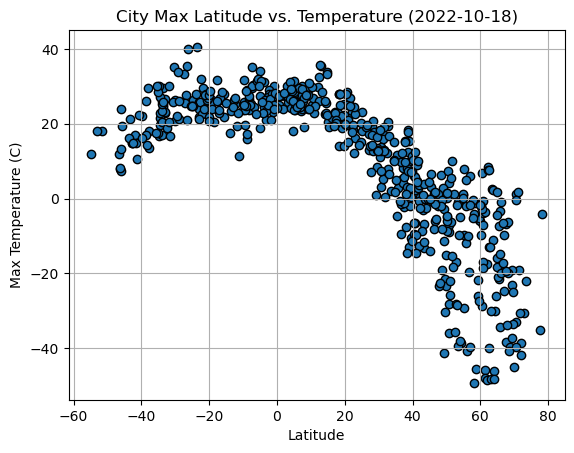

In [26]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Temperature vs. Latitude (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

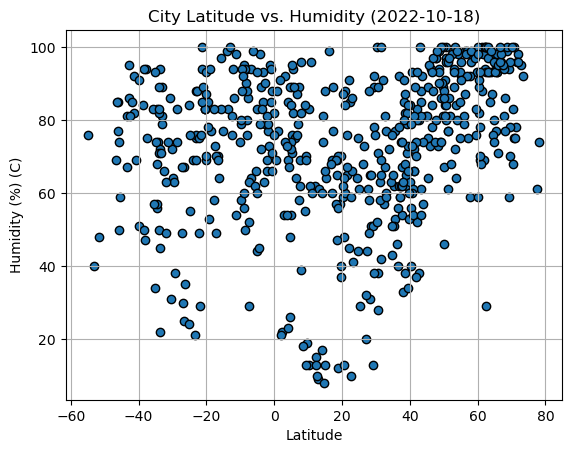

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%) (C)")
plt.grid()

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

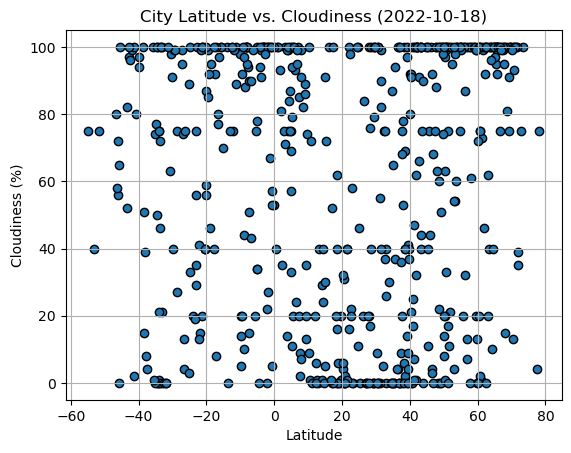

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

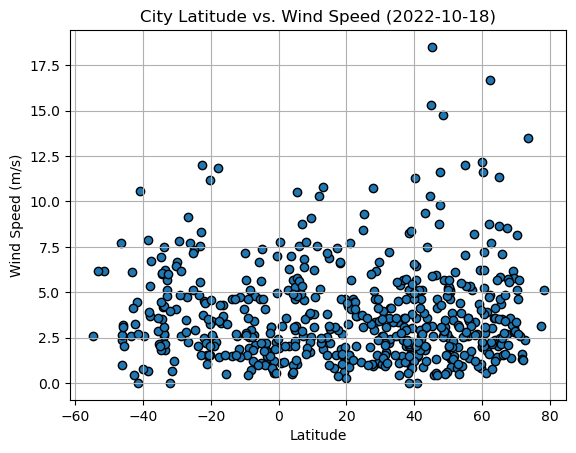

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def regression(x_values, y_values, title, cords):
    #Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, cords)
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print("The r value is: ", rvalue**2)
    plt.show()

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port hardy,50.6996,-127.4199,4.24,97,100,4.63,CA,1674321325
8,kedrovyy,56.1667,91.8167,-40.63,99,32,1.38,RU,1674321578
10,college,64.8569,-147.8028,-15.82,80,100,2.06,US,1674321579
11,camopi,3.1655,-52.3158,25.74,92,71,2.01,GF,1674321491
12,arvika,59.6553,12.5852,-5.66,98,20,0.81,SE,1674321579


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,-42.7826,147.0587,14.72,86,97,0.44,AU,1674321576
1,bambous virieux,-20.3428,57.7575,26.14,83,40,1.54,MU,1674321576
2,atuona,-9.8000,-139.0333,25.75,79,14,7.17,PF,1674321571
4,ushuaia,-54.8000,-68.3000,11.81,76,75,2.57,AR,1674321577
5,kramat,-8.1311,113.4499,23.53,94,100,0.73,ID,1674321577


###  Temperature vs. Latitude Linear Regression Plot

The r value is:  0.7078854423789807


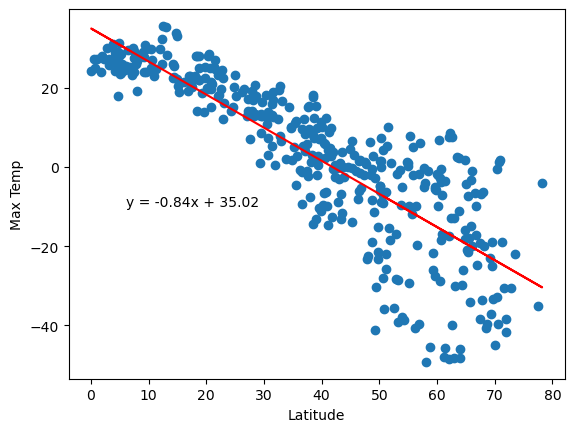

In [33]:
# Linear regression on Northern Hemisphere
regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp", (6, -10))

The r value is:  0.223883882766028


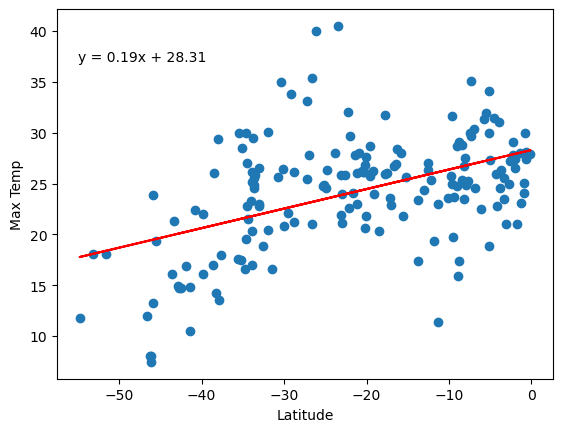

In [38]:
# Linear regression on Southern Hemisphere
regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp", (-55, 37))

**Discussion about the linear relationship:** The linear relationship between latitude and the max temperature has a strong correlation. In the data above, it appears to be the strongest in the northern hemimsphere, with an r value closest to 1.

### Humidity vs. Latitude Linear Regression Plot

The r value is:  0.2264534607820339


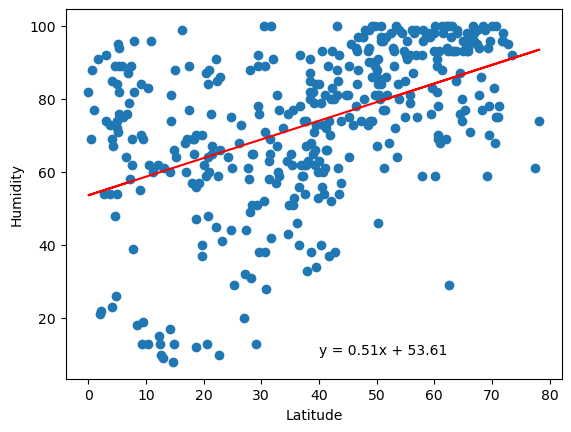

In [42]:
# Northern Hemisphere
regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity", (40, 10))

The r value is:  0.03249234228894456


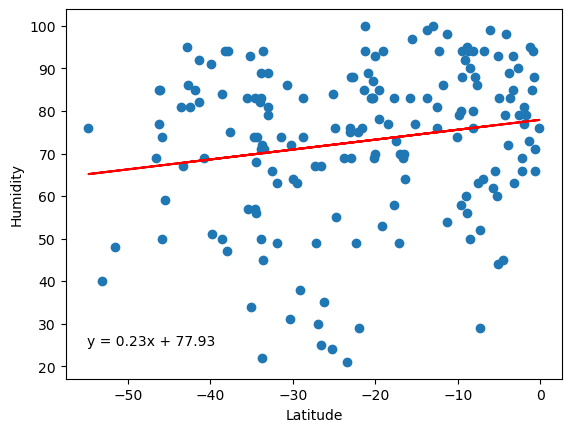

In [44]:
# Southern Hemisphere
regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity", (-55, 25))

**Discussion about the linear relationship:** In the northern hemisphere, there is a slight correlation between latitude and humidity, as compared to the southern hemisphere, which appears to have no correlation. 

### Cloudiness vs. Latitude Linear Regression Plot

The r value is:  0.06840900905314588


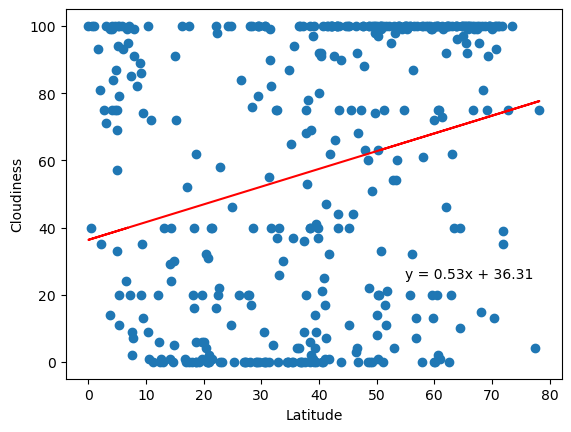

In [46]:
# Northern Hemisphere
regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness", (55, 25))

The r value is:  0.022868875367345734


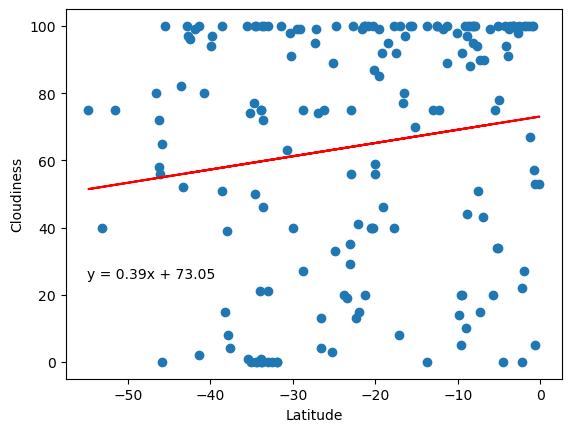

In [47]:
# Southern Hemisphere
regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness", (-55, 25))

**Discussion about the linear relationship:** In the data above, there appears to be no linear relationship between cloudiness and latitude. Much of the data is clustered near the 100% cloudiness, and 0%, making a linear relationship nearly impossible.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is:  0.0011239357683432384


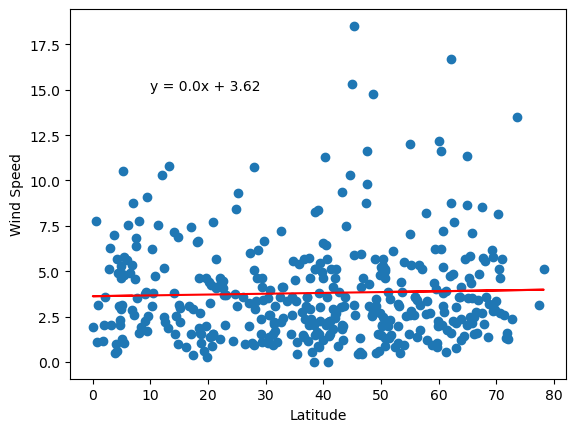

In [49]:
# Northern Hemisphere
regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed", (10, 15))

The r value is:  0.04585794344140143


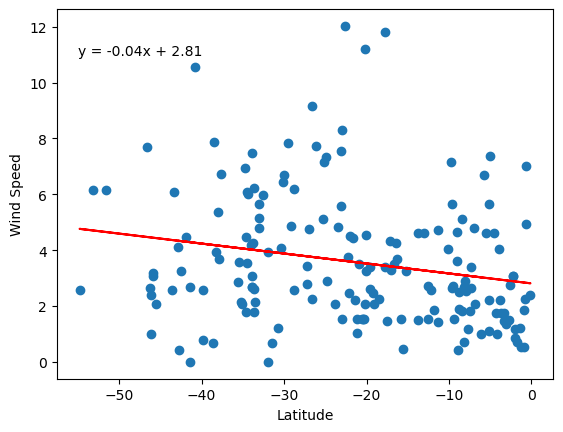

In [51]:
# Southern Hemisphere
regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed", (-55, 11))

**Discussion about the linear relationship:** There is not a strong linear relationship between latitude and wind speed, for either hemisphere. 